<a href="https://colab.research.google.com/github/vertical-aerospace/hello-world/blob/master/sophrodyneStallModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Look at the stall model within Sophrodyne
Sophrdyne has integrated some form of separation modelling, this notebook demonstrated how they work.

In [0]:
  import numpy as np
  import math
  import matplotlib.pyplot as plt
  
  a_1          = 2*np.pi 

  #-- only used for simple model
  CL_max       = 1.5
  
  alpha = np.linspace(0,20,20)*np.pi/180
  C_l_sep = []
  C_l_simp = []


  for ii in range(0, len(alpha)):
    # this just calcs the linear Cl
    C_l          = a_1*alpha
        
    #-- model with stall -------
    alpha_max    = 13.0*np.pi/180.0
    squeeze      = 30.0
    CL_stalled   =  1.0 
    CL_unstalled = a_1*alpha[ii]
    interp       = 0.5*(1.0+math.erf((alpha[ii]-alpha_max)*squeeze))
    C_l_sep.append((1.0-interp)*CL_unstalled + interp*CL_stalled)
    
    #--simplified nonlinear model
    k            = - a_1 / CL_max
    C_l_simp.append(CL_max * (1.0 - math.exp( k * alpha[ii] )))

Now we can plot the two simple separation models through looking at how the $C_L$ changes with angle of attack.

Text(0, 0.5, '$C_l$')

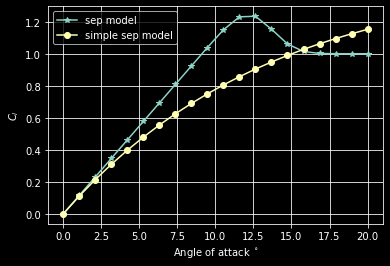

In [44]:
plt.style.use(['dark_background'])
plt.plot(np.rad2deg(alpha), C_l_sep,'-*',np.rad2deg(alpha), C_l_simp,'-o')
plt.legend(['sep model', 'simple sep model'])
plt.grid(axis='both',which='both')
plt.xlabel('Angle of attack $^\circ$')
plt.ylabel('$C_l$')